<a href="https://colab.research.google.com/github/ayush2444/LetsGrowMore-Internship-/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Let's Grow More Data Science Virtual Internship Program July 2023

##BY: Ayush shrivastava
INTERMEDIATE LEVEL TASK

###TASK 2:Prediction using Decision Tree  Algorithm :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
# Import necessary libraries for graph viz
#from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas.util.testing as tm
%matplotlib inline

###Import data

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.columns.to_list()

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
## droping the ID columns beacuse it is not necessary

df.drop("Id", axis = 1 , inplace = True )

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


####Checking Null Values

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#####NO null values found

####Checking duplicated values

In [ ]:
df.duplicated().sum()

3

In [ ]:

iris_data = df.drop_duplicates()
iris_data.duplicated().sum()

0

###Detect Outlier

<Axes: >

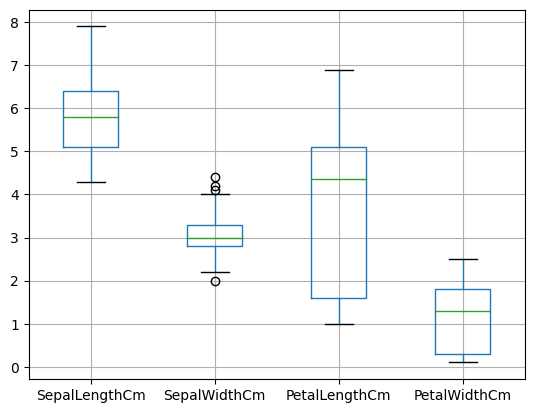

In [ ]:
df.boxplot()

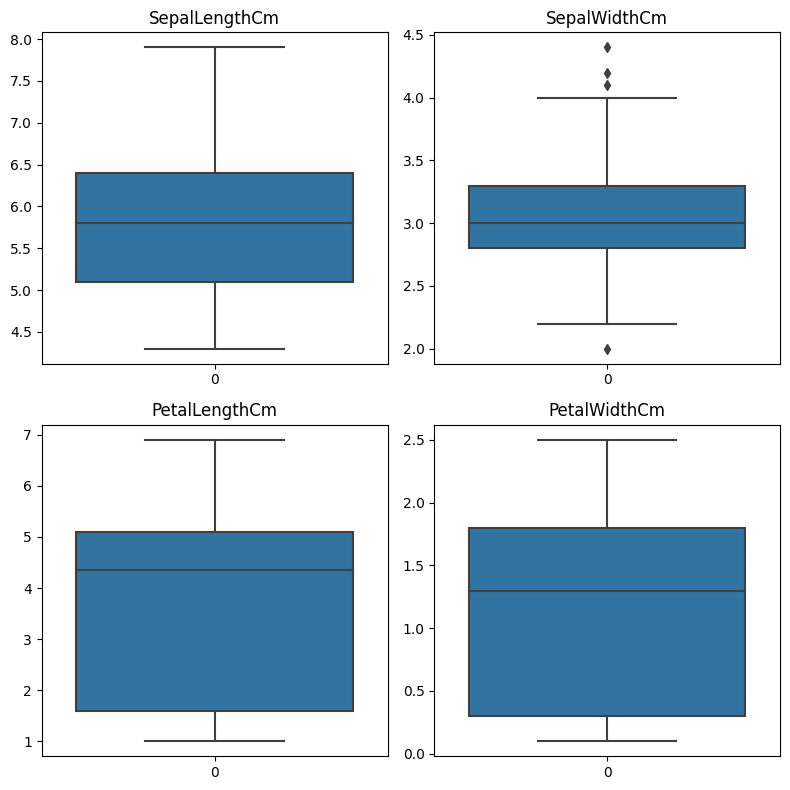

In [ ]:
# Handling Outliers & Outlier treatments
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i, ax in zip(df, axes.flatten()):
    sns.boxplot(df[i], ax=ax)
    ax.set_title(i)
plt.tight_layout()

In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

print("Quartile 1:", Q1)
print("Quartile 3:", Q3)
print("Interquartile Range:", IQR)

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper Bound:", upper)
print("Lower Bound:", lower)

outliers_upper = df[df['SepalWidthCm'] > upper]
outliers_lower = df[df['SepalWidthCm'] < lower]

print("Number of Outliers (Upper):", outliers_upper.shape[0])
print("Number of Outliers (Lower):", outliers_lower.shape[0])


Quartile 1: 2.8
Quartile 3: 3.3
Interquartile Range: 0.5
Upper Bound: 4.05
Lower Bound: 2.05
Number of Outliers (Upper): 3
Number of Outliers (Lower): 1


In [ ]:
##Dropping the outlier
data = df.drop(index= outliers_upper.shape[0])
data = df.drop(index= outliers_lower.shape[0])

In [ ]:
data = df[(df['SepalWidthCm'] >= lower) & (df['SepalWidthCm'] <= upper)]

print("After Removing Outliers:", data.shape)

After Removing Outliers: (146, 5)


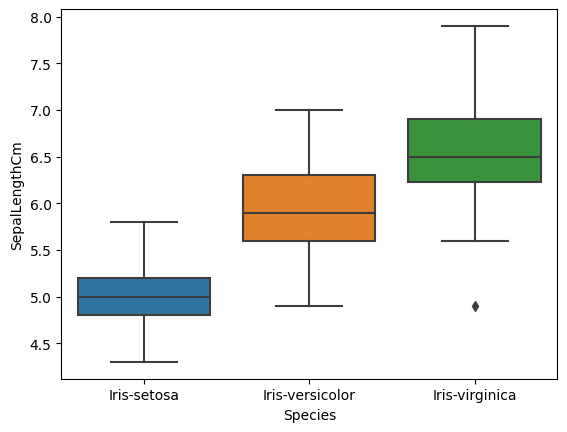

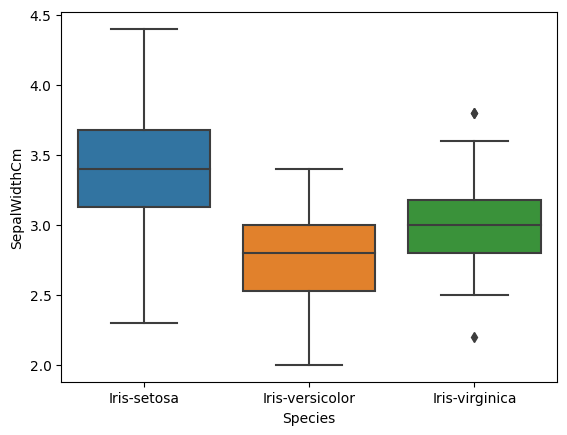

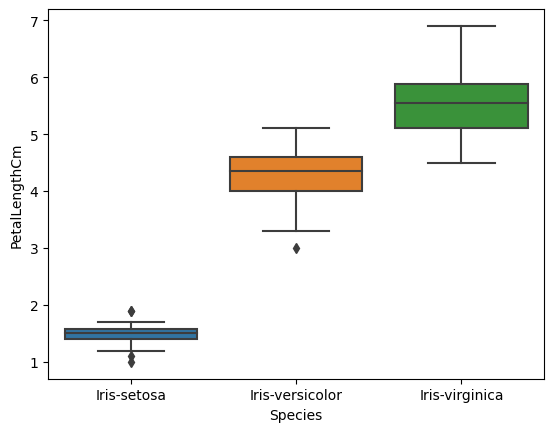

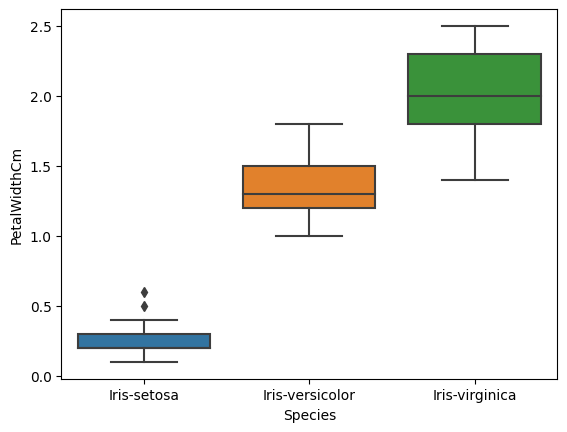

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    if df[col].dtypes != "object":
        sns.boxplot(x='Species', y=col, data=df)  # Create boxplot for each numerical column against 'Species'
        plt.show()


###Checking correlation

## Exploratory Data Analysis:

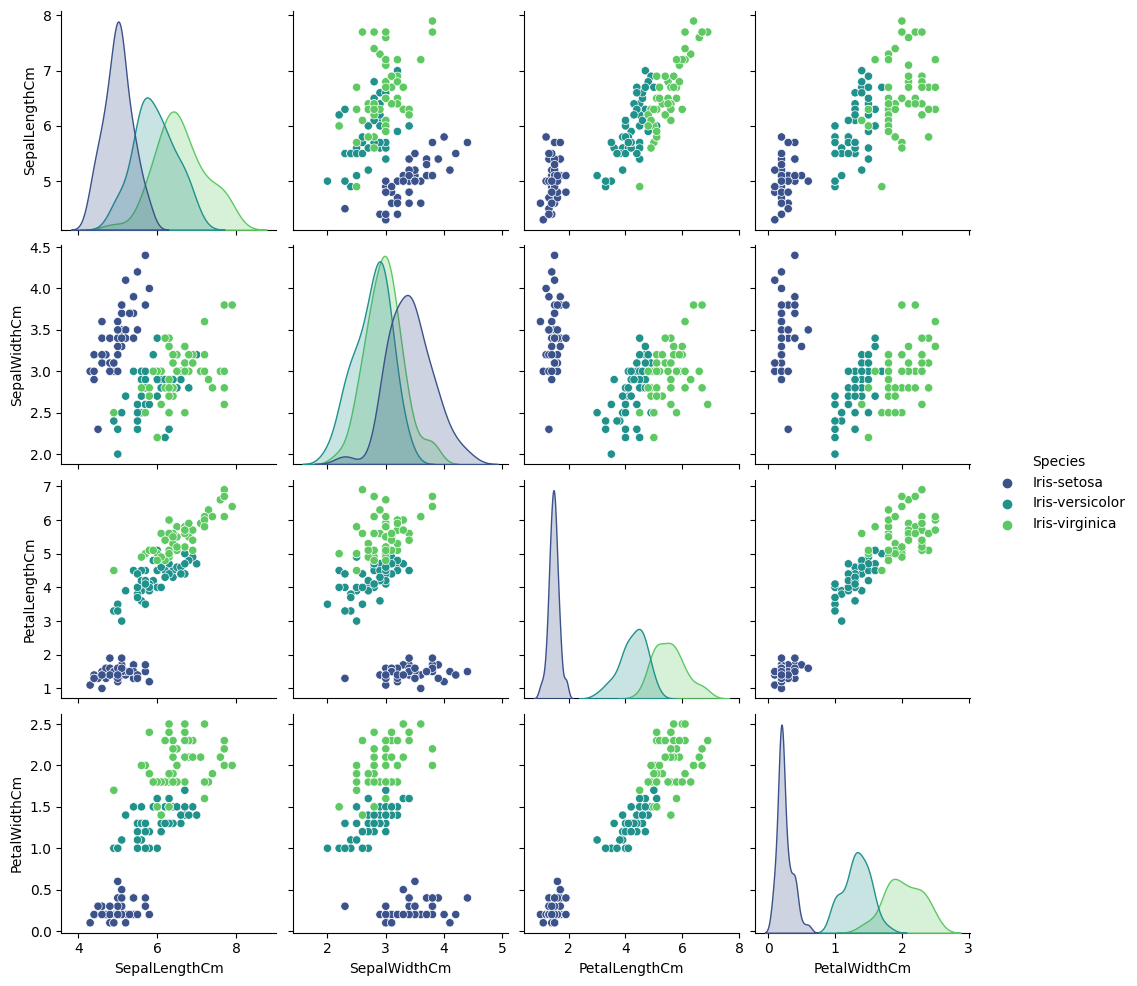

In [ ]:
sns.pairplot(df, palette='viridis', hue="Species")


In [ ]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

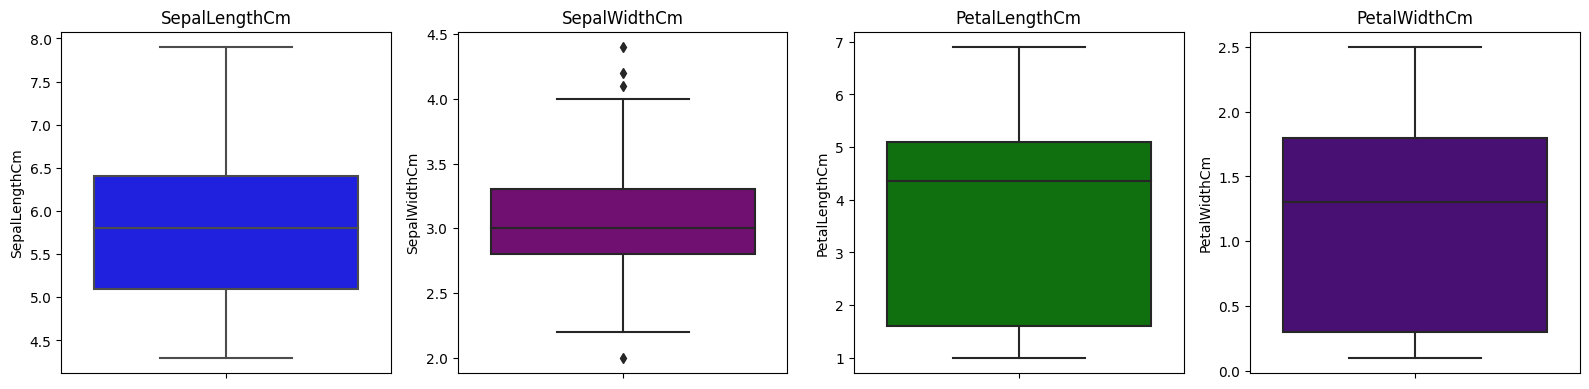

In [ ]:
plt.figure(figsize=(16, 4))

variables = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
colors = ['blue', 'purple', 'green', 'indigo']

for i, variable in enumerate(variables):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df, y=variable, color=colors[i])
    plt.title(variable)

plt.tight_layout()
plt.show()

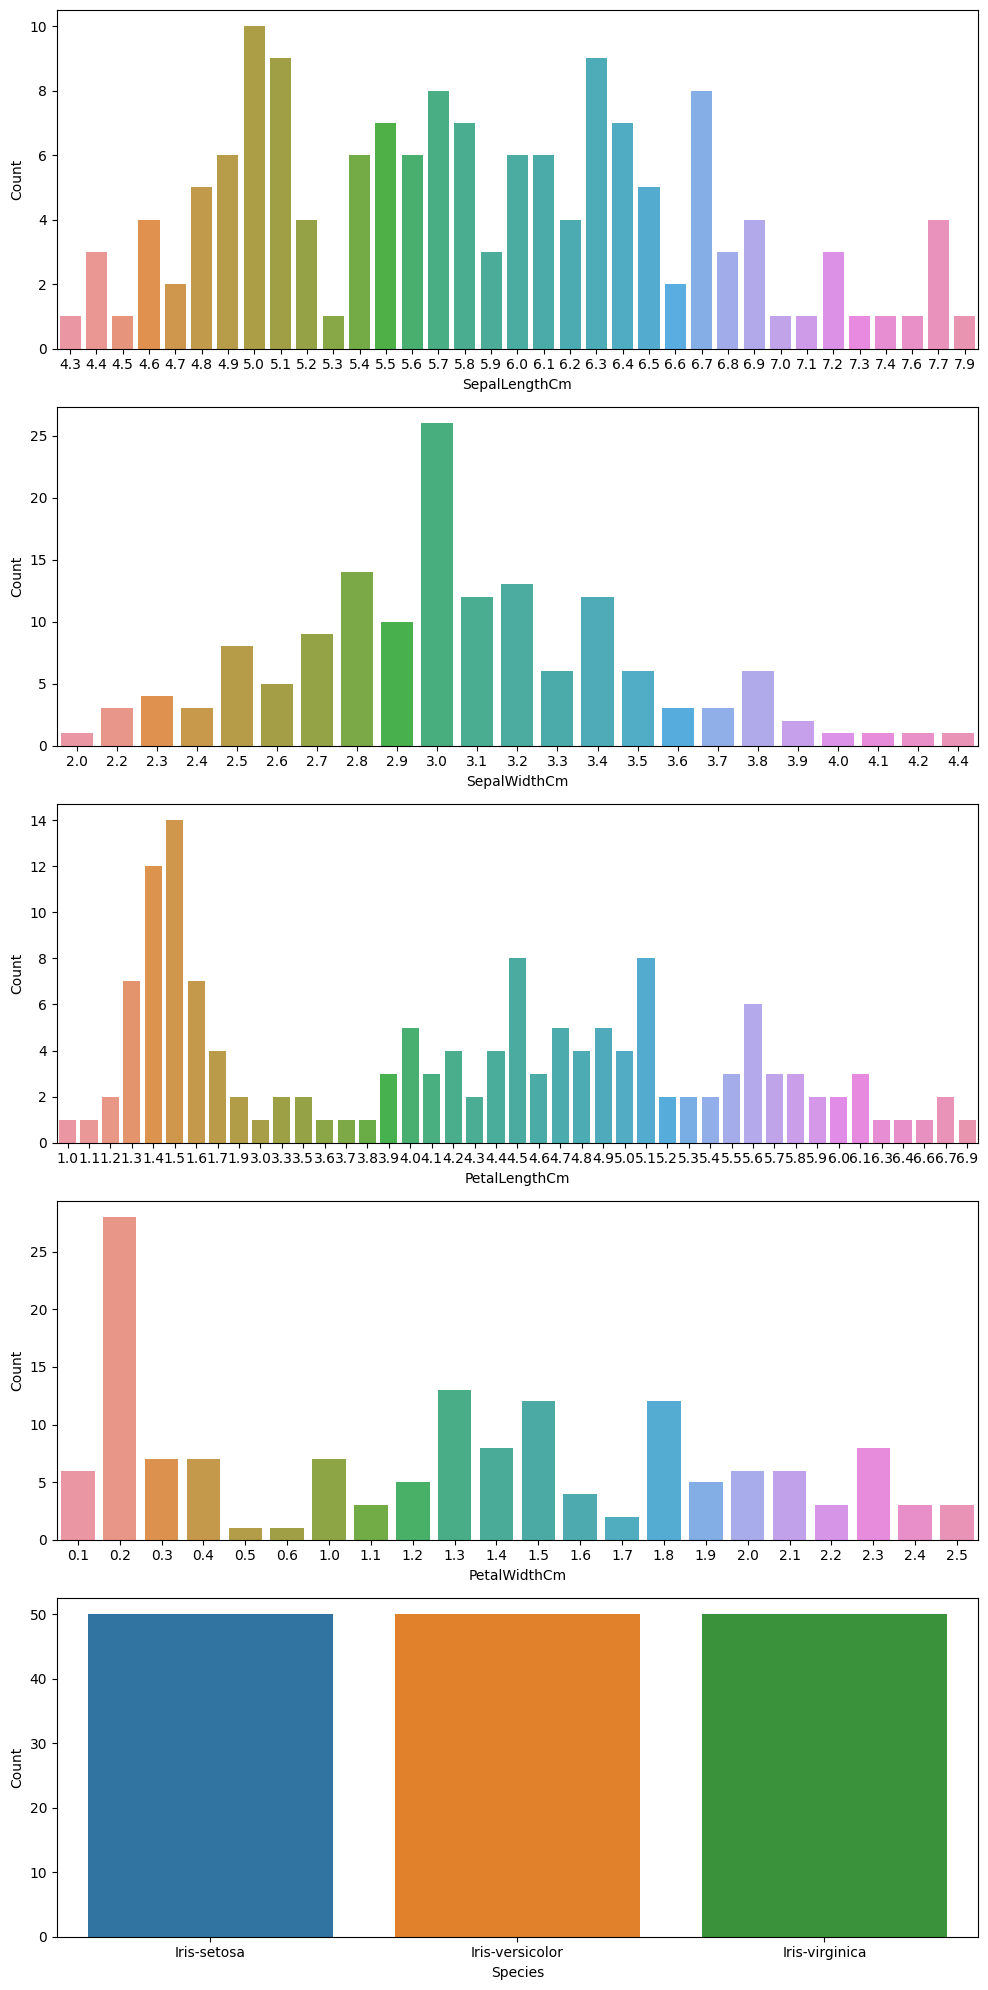

In [ ]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(df.columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_ylabel("Count")

plt.tight_layout()  # To avoid overlapping labels and titles
plt.show()


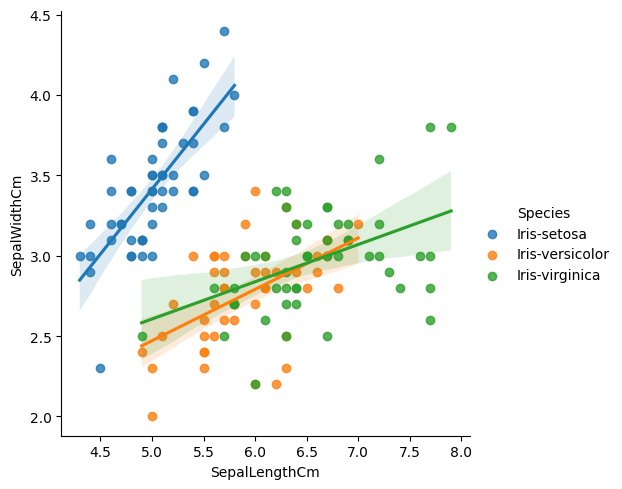

In [ ]:
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df)

<ipython-input-29-a4c5692666f5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='cubehelix')


<Axes: >

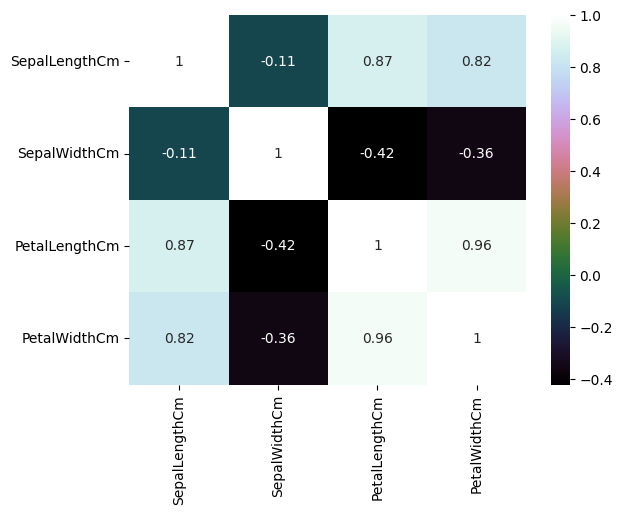

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap='cubehelix')

###Data Preprocessing

In [ ]:
X = df.drop('Species', axis = 1)
Y = df['Species']

####Train-Test Split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,Y, test_size=0.2, random_state=324)

In [ ]:
## Import decisionm Tree
from  sklearn.tree import DecisionTreeClassifier

In [ ]:
D_tree = DecisionTreeClassifier()
decision_tree = D_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)

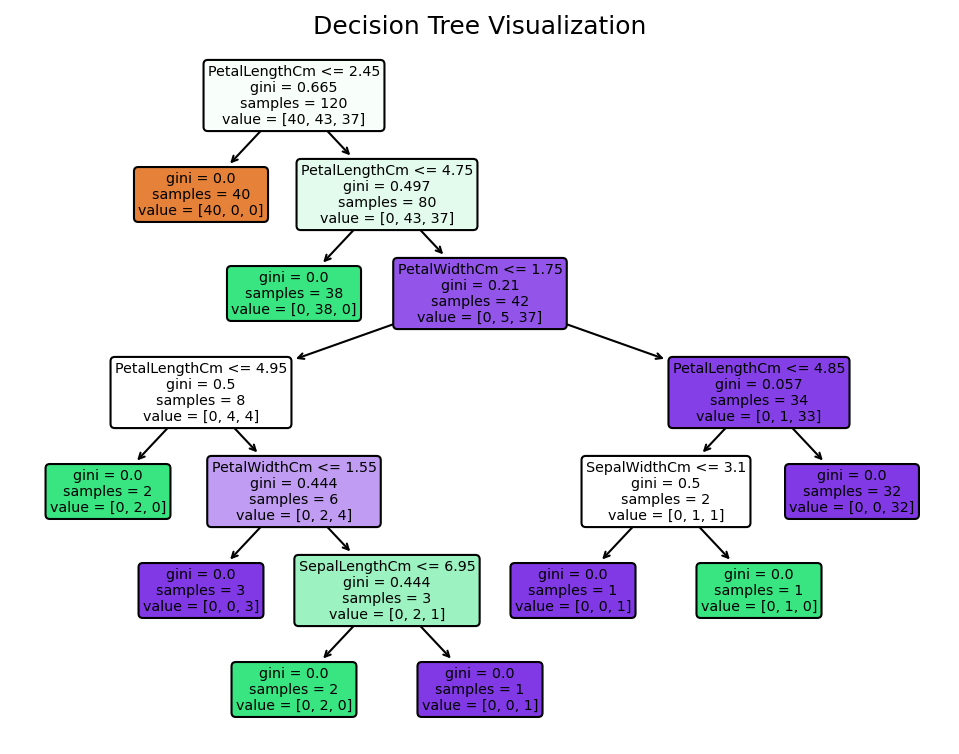

In [ ]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=150)

# Add additional attributes
tree_attributes = {
    'filled': True,
    'rounded': True,
    'feature_names': list(df.columns),

}

# Assuming you have already trained the decision_tree model
plot_tree(decision_tree, **tree_attributes)

plt.title("Decision Tree Visualization")
plt.show()


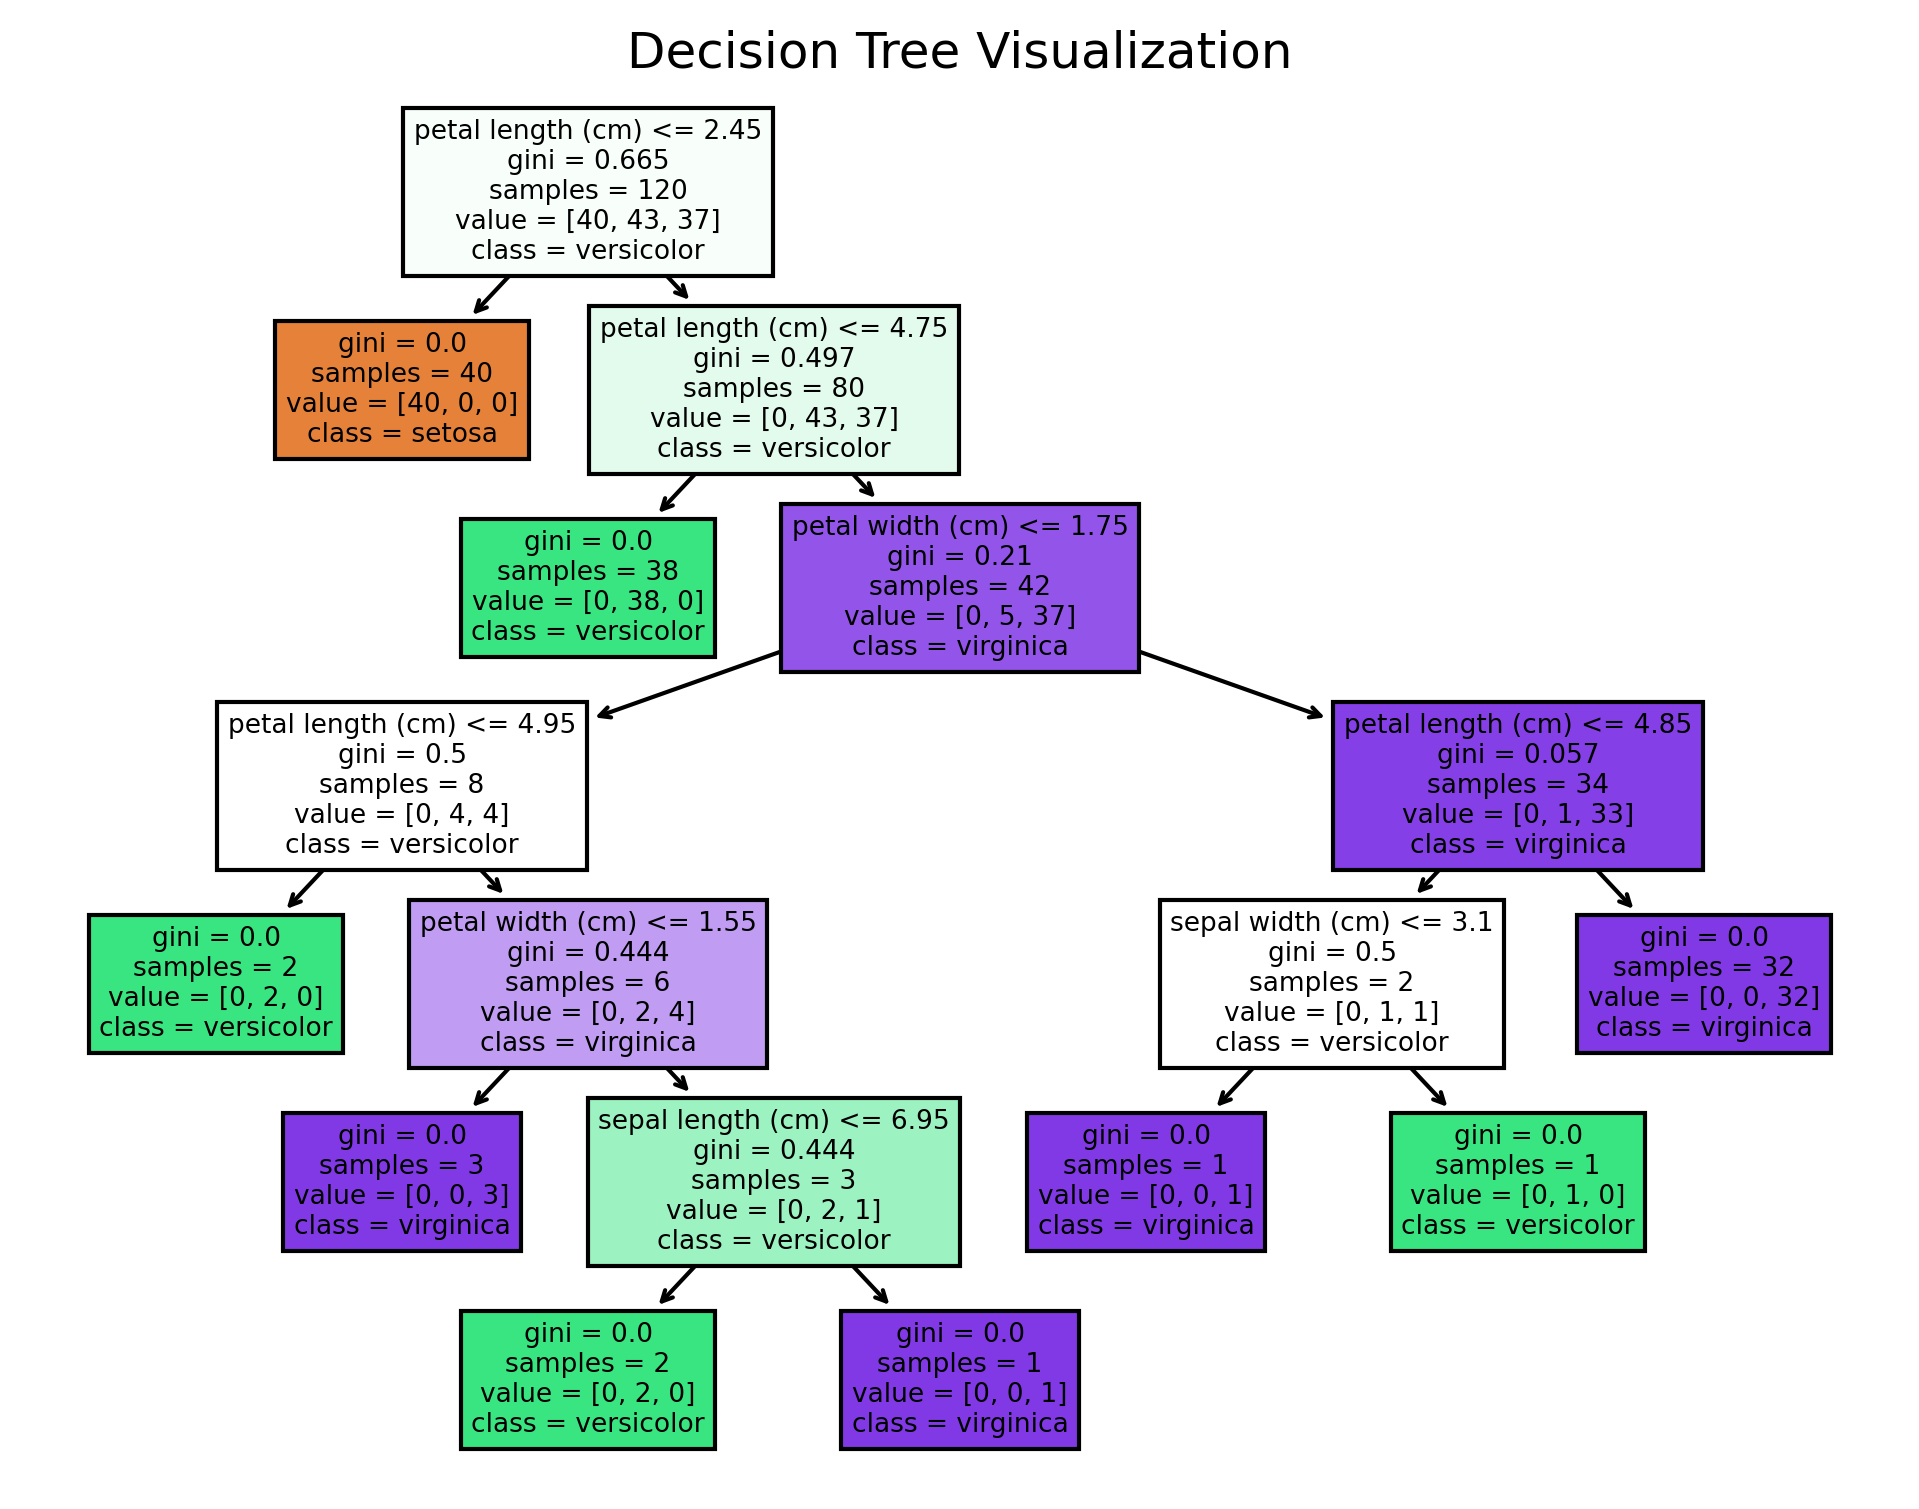

In [ ]:
function = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=300)

# Assuming you have already trained the decision_tree model
plot_tree(D_tree, feature_names=function, class_names=Class, filled=True)

plt.title("Decision Tree Visualization")
plt.show()


<ipython-input-64-38f0689bf7e3>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  custom_cmap = cm.get_cmap('coolwarm')  # Replace 'coolwarm' with any other valid colormap


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      1.00      0.93         7
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



<Axes: >

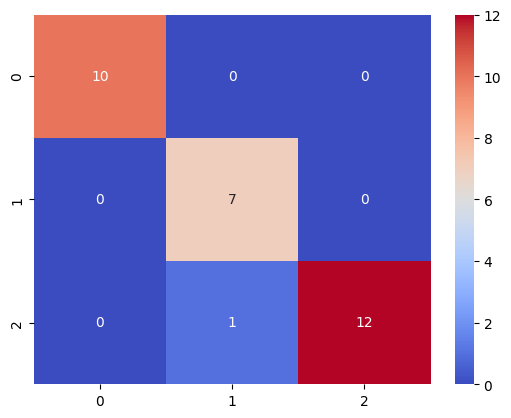

In [ ]:
import matplotlib.cm as cm

custom_cmap = cm.get_cmap('coolwarm')  # Replace 'coolwarm' with any other valid colormap
print(classification_report(y_test, Y_pred))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, cmap=custom_cmap)


In [ ]:
accuracy_score(y_test, Y_pred)

0.9666666666666667

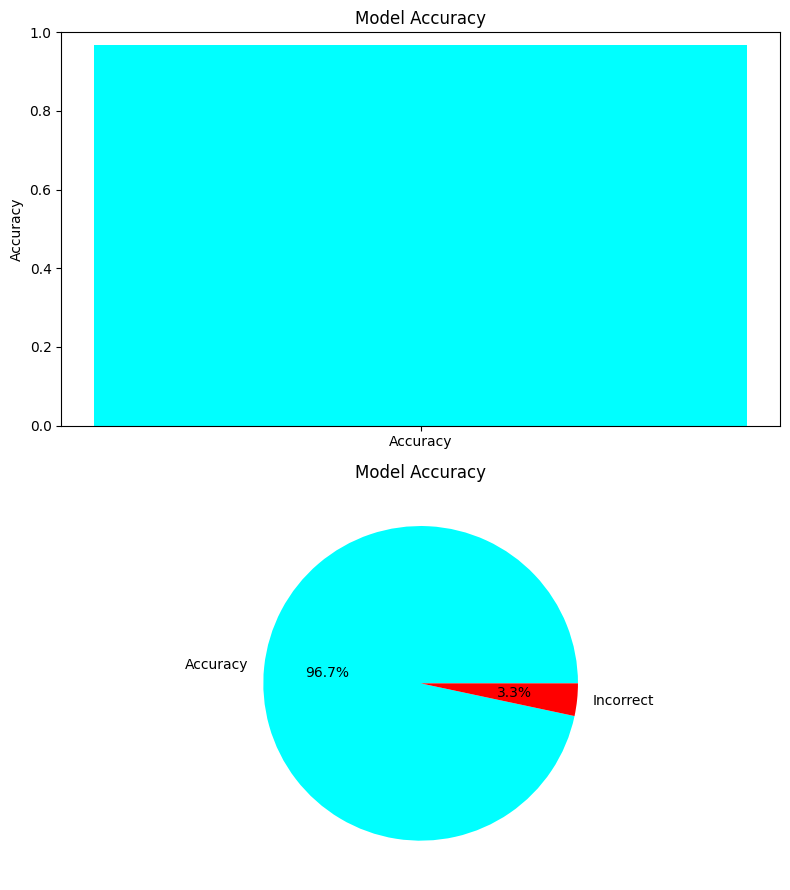

In [ ]:
# Assuming you have already trained your model and obtained the predicted values Y_pred
accuracy = accuracy_score(y_test, Y_pred)

# Create subplots with two rows and one column
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 9))

# Plot the accuracy as a bar plot
axes[0].bar(['Accuracy'], [accuracy], color='cyan')
axes[0].set_ylim(0, 1)  # Set the y-axis limit to show accuracy between 0 and 1
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy')

# Plot the accuracy as a pie chart
labels = ['Accuracy', 'Incorrect']
sizes = [accuracy, 1 - accuracy]
colors = ['cyan', 'red']
axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Model Accuracy')

plt.tight_layout()  # To avoid overlapping labels and titles
plt.show()
